#Task:

Based on rented bike count, the hour of the day, the day's temperature, humidity, wind speed, rainfall, holidays, and many other factors, build a model to predict the bike
count required each hour for a stable supply of rental bikes.


In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [62]:
# The input file is not in UTF-8 therefore we need to try other encodings

try:
  bike = pd.read_csv('/content/FloridaBikeRentals.csv', encoding='Latin-1')
  print("Successfully read the file with encoding Latin-1.")
  print(bike.head())
except UnicodeDecodeError:
  print("Latin-1 encoding failed.")

Successfully read the file with encoding Latin-1.
         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0   

In [63]:
bike.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [64]:
bike.isnull().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


In [65]:
bike.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [66]:
# Date column conversion from int to datetime

bike['Date'] = pd.to_datetime(bike['Date'], format='%d/%m/%Y')

In [67]:
# Extract Day, Month and Year from Date Column

bike['Day'] = bike['Date'].dt.day
bike['Month'] = bike['Date'].dt.month
bike['Year'] = bike['Date'].dt.year

bike.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017


In [68]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
bike['Holiday_cat'] = le.fit_transform(bike['Holiday'])
bike['Season_Cat'] = le.fit_transform(bike['Seasons'])
bike['functioning_day_cat'] = le.fit_transform(bike['Functioning Day'])
bike['Weekend'] = np.where(bike['Day'].isin([6, 7]), 1, 0)
bike.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Seasons,Holiday,Functioning Day,Day,Month,Year,Holiday_cat,Season_Cat,functioning_day_cat,Weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,Winter,No Holiday,Yes,1,12,2017,1,3,1,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,Winter,No Holiday,Yes,1,12,2017,1,3,1,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,Winter,No Holiday,Yes,1,12,2017,1,3,1,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,Winter,No Holiday,Yes,1,12,2017,1,3,1,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,Winter,No Holiday,Yes,1,12,2017,1,3,1,0


In [69]:
df_corr = bike.drop(['Date', 'Holiday', 'Seasons', 'Functioning Day'], axis=1)

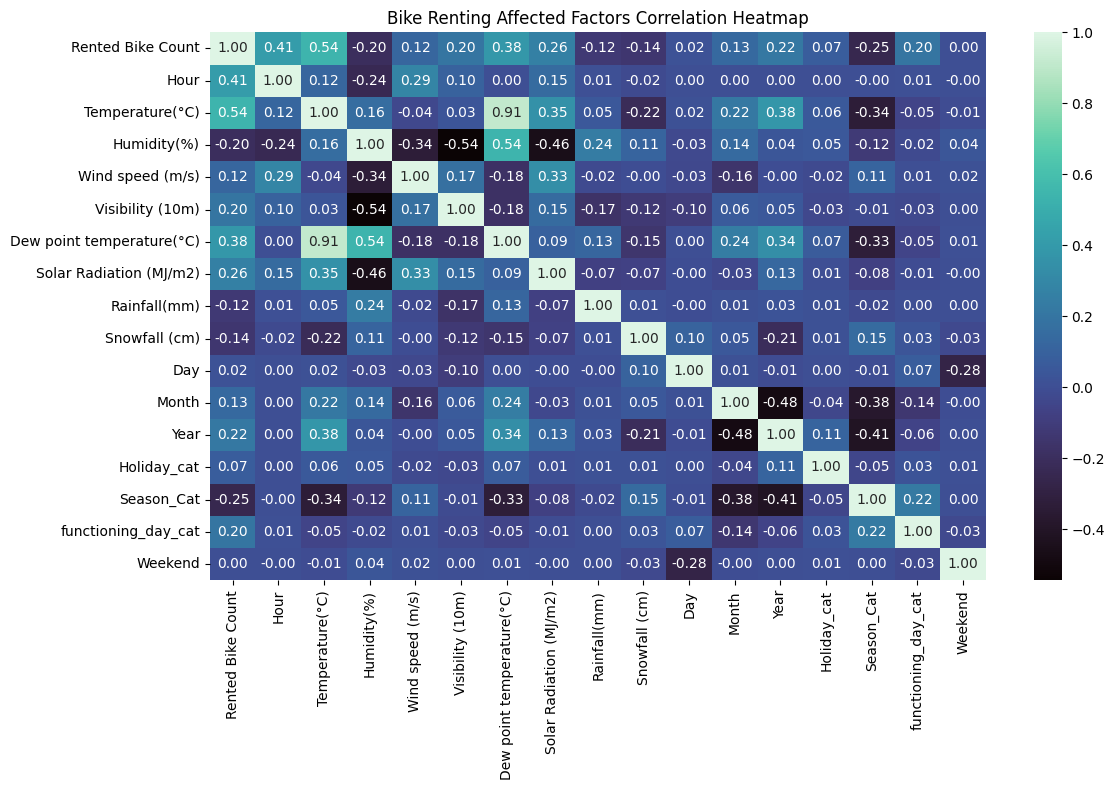

In [70]:
correlation = df_corr.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap = 'mako', fmt=".2f")
plt.title("Bike Renting Affected Factors Correlation Heatmap")
plt.tight_layout()
plt.show()

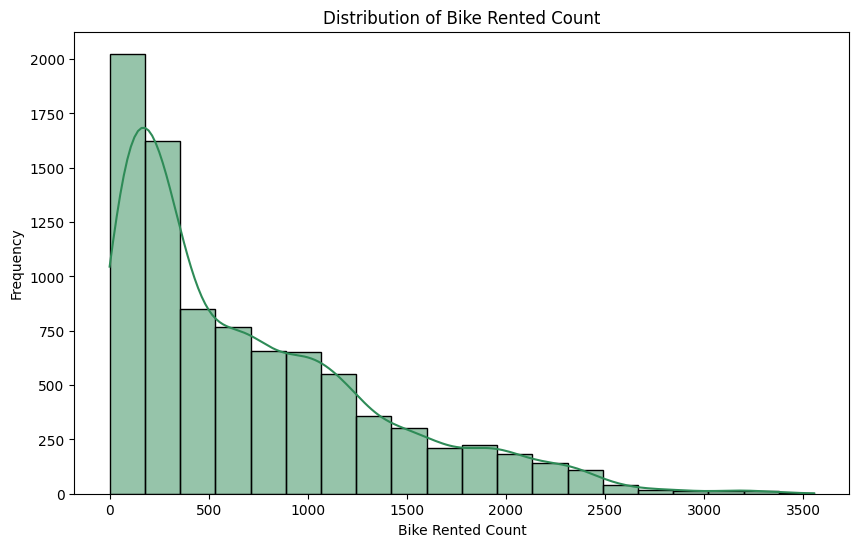

In [71]:
# Plot the distribution of Bike rented count

plt.figure(figsize=(10, 6))
sns.histplot(bike['Rented Bike Count'], bins=20, kde=True, color='seagreen')
plt.title('Distribution of Bike Rented Count')
plt.xlabel('Bike Rented Count')
plt.ylabel('Frequency')
plt.show()

#Observation:
The Bike Rent Count is positvely skewed.

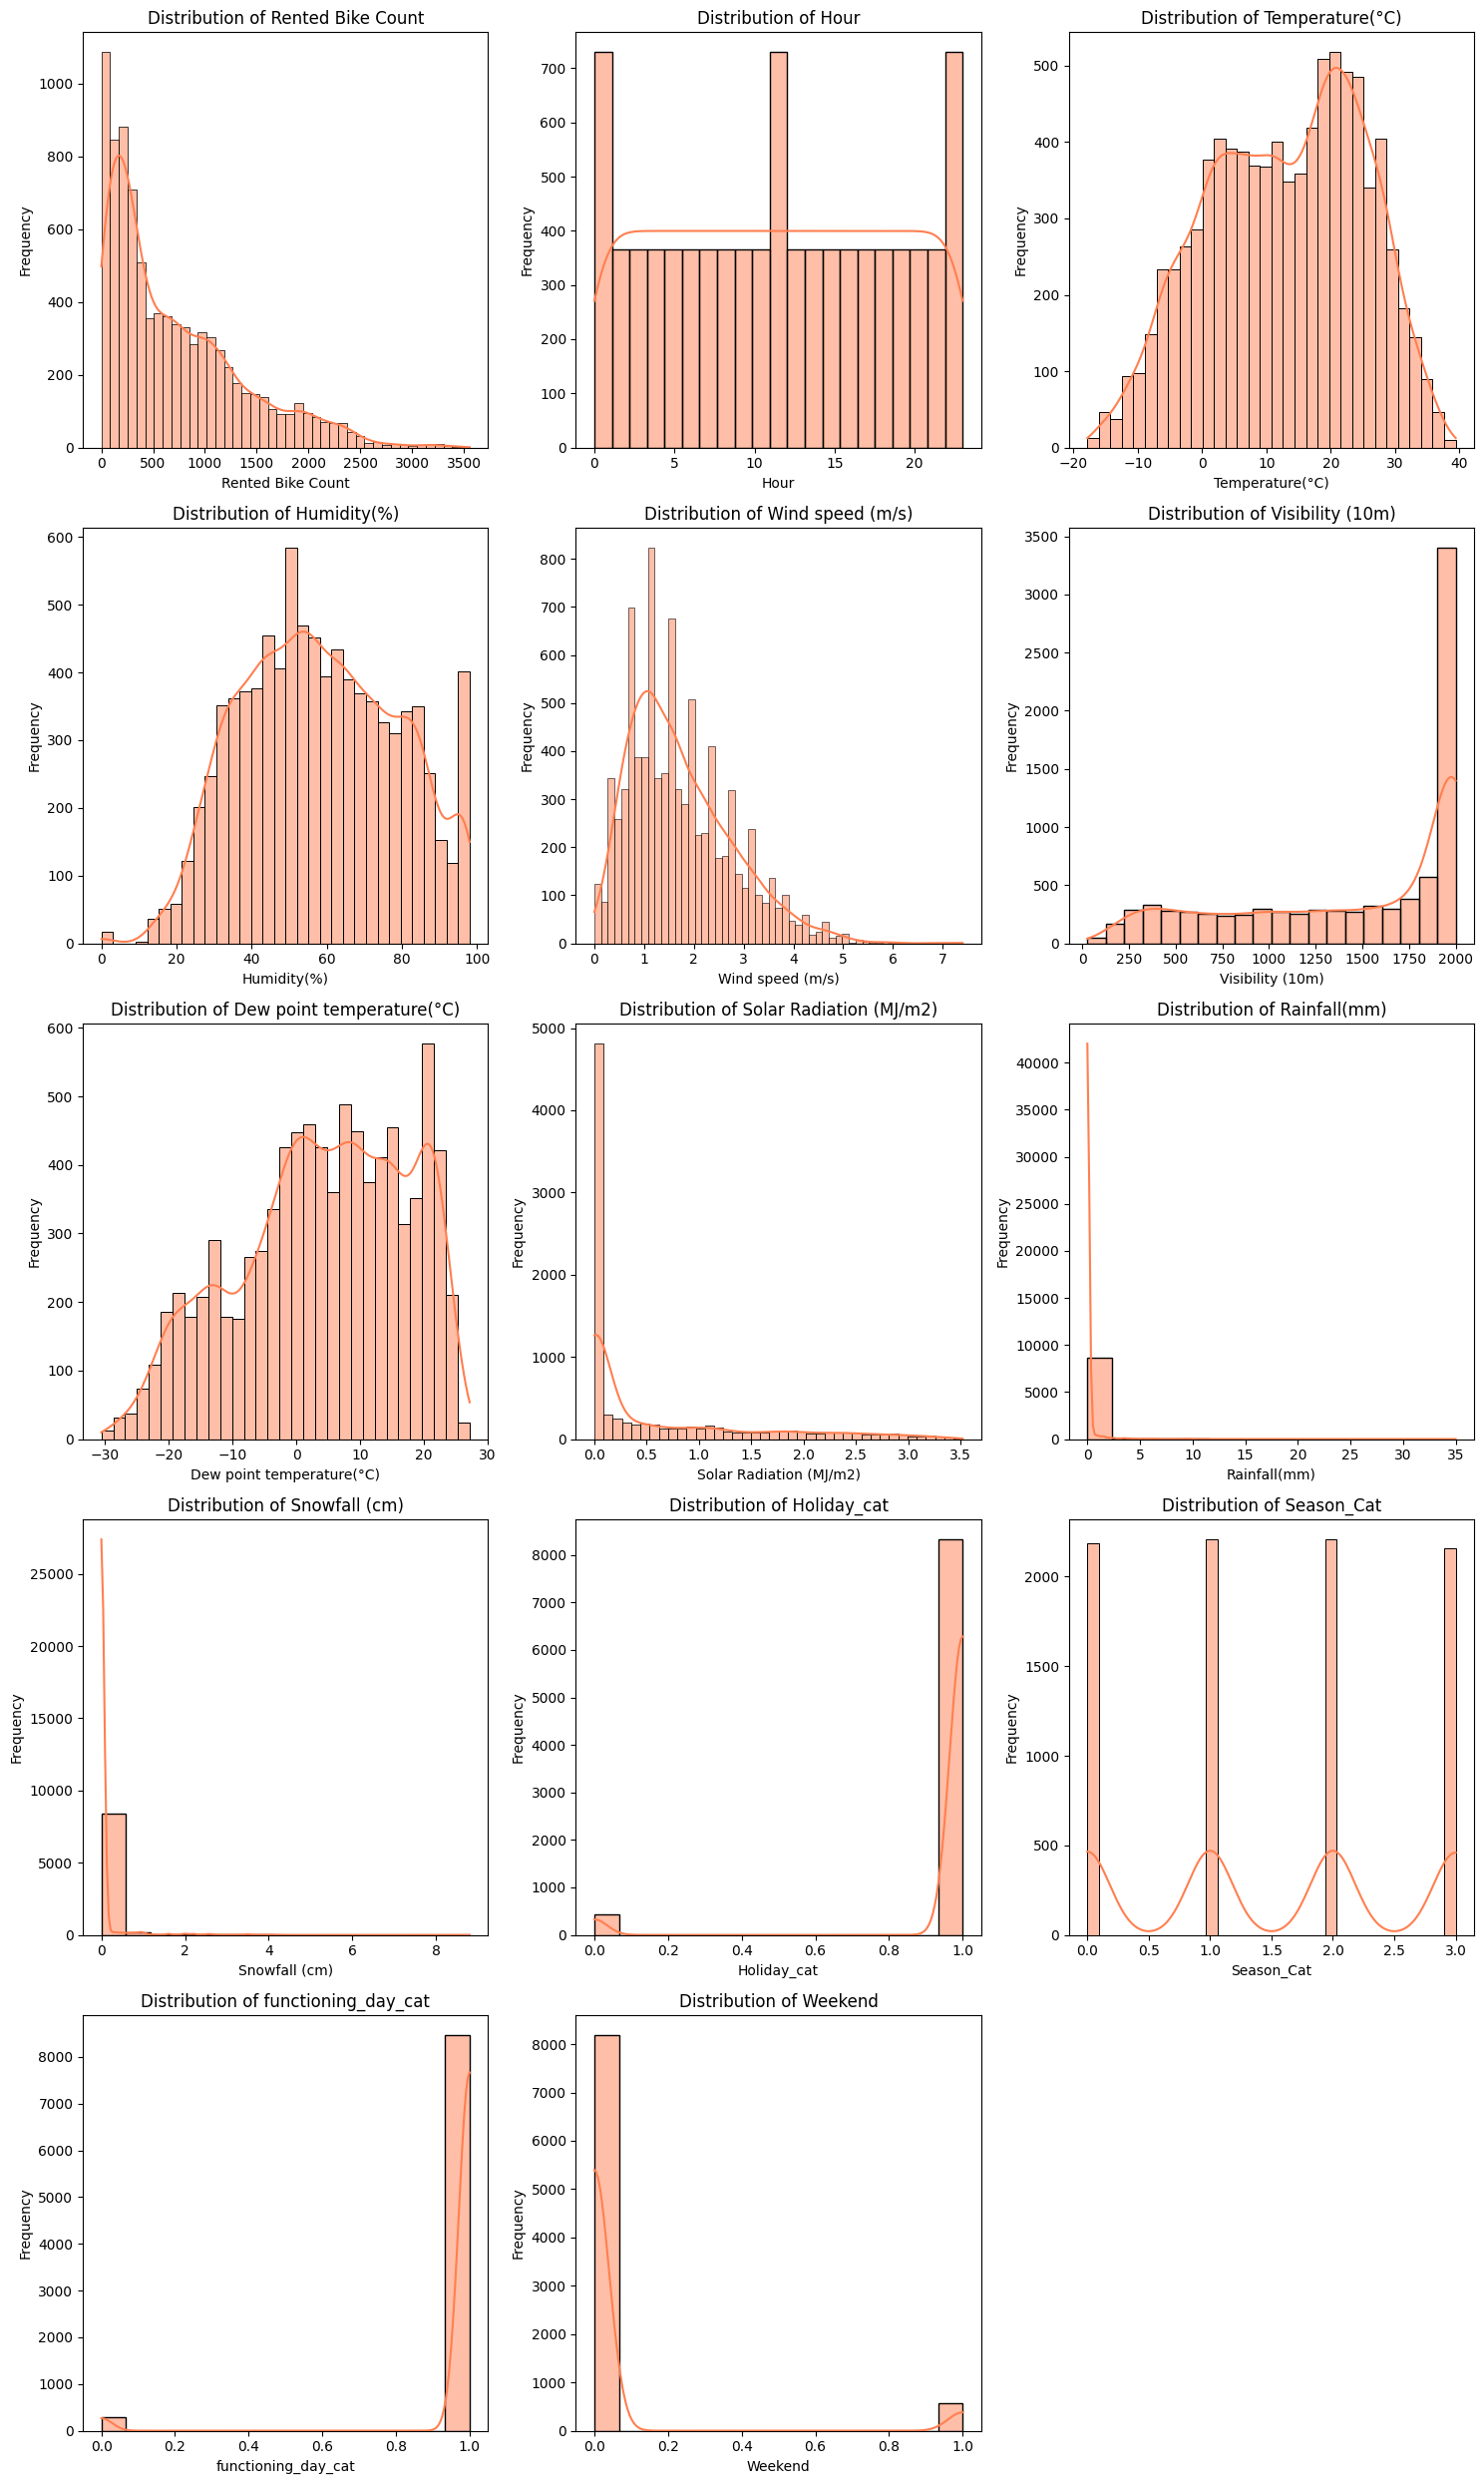

In [72]:
# Plot Histogram for all the numerical features

numerical_feature = bike.select_dtypes(include=['int64', 'float64']).columns
num_features = len(numerical_feature)
num_features

num_rows = (num_features + 2) //3
num_columns = min(num_features, 3)

plt.figure(figsize=(15, 5 * num_rows))

for i, feature in enumerate(numerical_feature, 1):
  plt.subplot(num_rows, num_columns, i)
  sns.histplot(bike[feature], kde=True, color='coral')
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

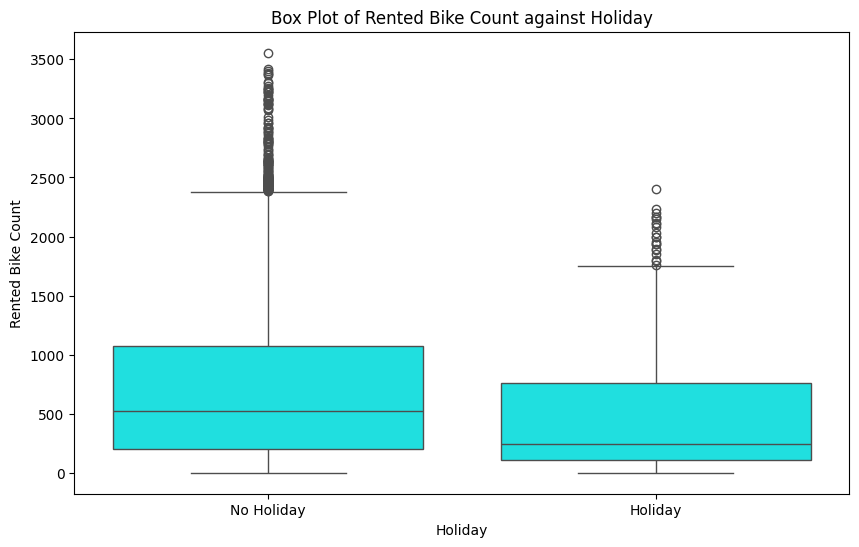

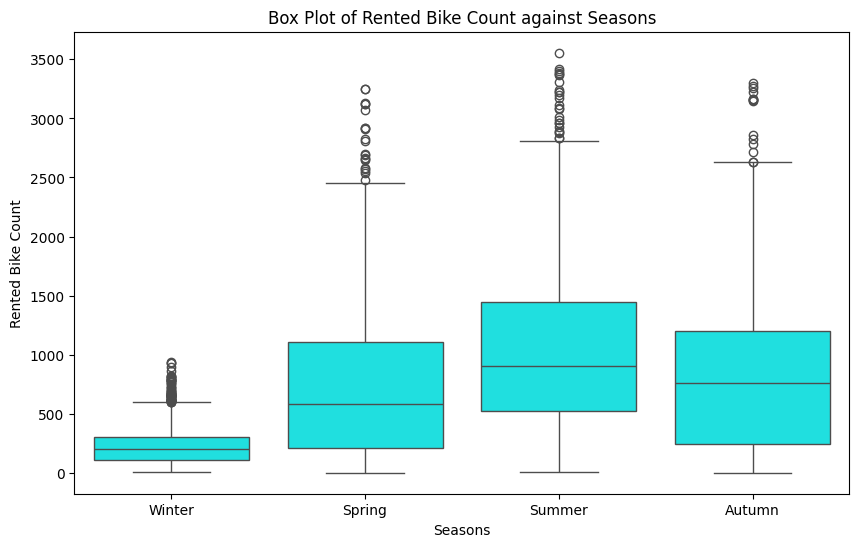

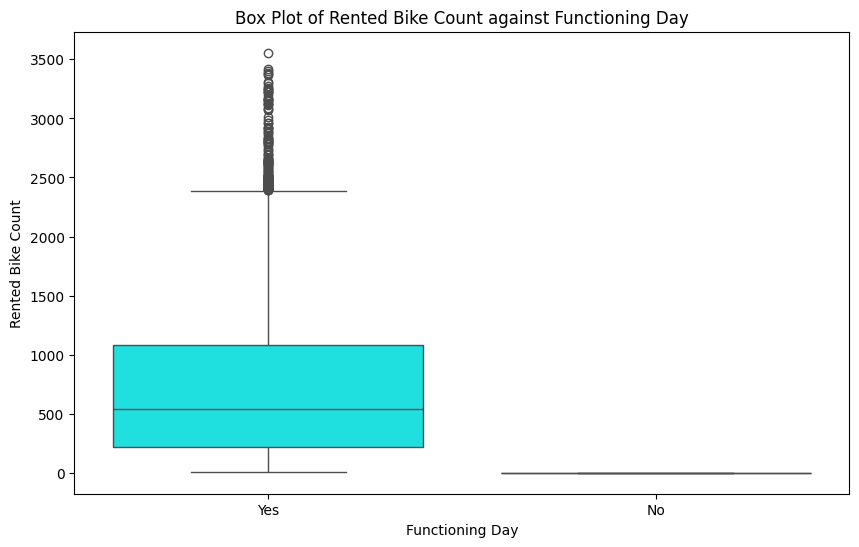

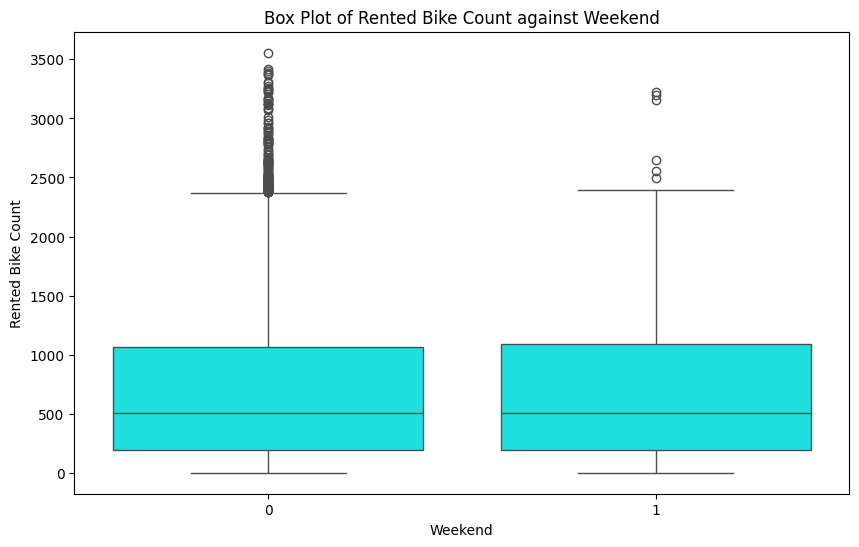

In [73]:
# Plot the box plot of Rented Bike Count against all the categorical features (Hint: Categorical
# features on X-axis and  Rented Bike Count on Y-axis)

categorical_features = ['Holiday', 'Seasons', 'Functioning Day', 'Weekend']
for feature in categorical_features:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=feature, y='Rented Bike Count', data=bike, color='cyan')
  plt.title(f'Box Plot of Rented Bike Count against {feature}')
  plt.xlabel(feature)
  plt.ylabel('Rented Bike Count')
  plt.show()

<Figure size 800x600 with 0 Axes>

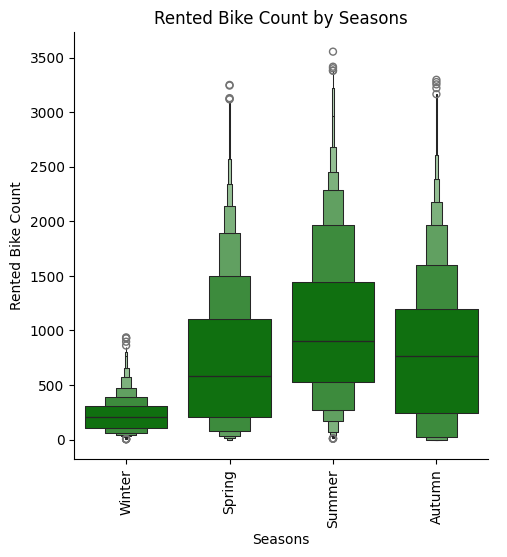

In [74]:
# Plot a Hour catplot against Rented Bike Count

plt.figure(figsize=(8, 6))
sns.catplot(x=bike['Seasons'], y=bike['Rented Bike Count'], data=bike, kind='boxen',color='green')
plt.title('Rented Bike Count by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.xticks(rotation=90)
plt.show()

In [75]:
bike.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Seasons,Holiday,Functioning Day,Day,Month,Year,Holiday_cat,Season_Cat,functioning_day_cat,Weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,Winter,No Holiday,Yes,1,12,2017,1,3,1,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,Winter,No Holiday,Yes,1,12,2017,1,3,1,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,Winter,No Holiday,Yes,1,12,2017,1,3,1,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,Winter,No Holiday,Yes,1,12,2017,1,3,1,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,Winter,No Holiday,Yes,1,12,2017,1,3,1,0


In [76]:
# Convert Categorical data using get_dummies

bike = pd.get_dummies(bike, columns=['Holiday', 'Seasons', 'Functioning Day'])
bike.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,functioning_day_cat,Weekend,Holiday_Holiday,Holiday_No Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Functioning Day_No,Functioning Day_Yes
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,1,0,False,True,False,False,False,True,False,True
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,1,0,False,True,False,False,False,True,False,True
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,1,0,False,True,False,False,False,True,False,True
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,1,0,False,True,False,False,False,True,False,True
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,1,0,False,True,False,False,False,True,False,True


In [77]:
# Convert true false of Get dummies data to 0 and 1
bike['Holiday_Holiday'] = bike['Holiday_Holiday'].astype(int)
bike['Holiday_No Holiday'] = bike['Holiday_No Holiday'].astype(int)
bike['Seasons_Autumn'] = bike['Seasons_Autumn'].astype(int)
bike['Seasons_Spring'] = bike['Seasons_Spring'].astype(int)
bike['Seasons_Summer'] = bike['Seasons_Summer'].astype(int)
bike['Seasons_Winter'] = bike['Seasons_Winter'].astype(int)
bike['Functioning Day_No'] = bike['Functioning Day_No'].astype(int)
bike['Functioning Day_Yes'] = bike['Functioning Day_Yes'].astype(int)


In [78]:
bike.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,functioning_day_cat,Weekend,Holiday_Holiday,Holiday_No Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Functioning Day_No,Functioning Day_Yes
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,1,0,0,1,0,0,0,1,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,1,0,0,1,0,0,0,1,0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,1,0,0,1,0,0,0,1,0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,1,0,0,1,0,0,0,1,0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,1,0,0,1,0,0,0,1,0,1


In [79]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Day                        8760 non-null   int32         
 12  Month 

In [80]:
bike = bike.drop(['Holiday_cat', 'Season_Cat', 'functioning_day_cat'], axis=1)

In [81]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Day                        8760 non-null   int32         
 12  Month 

In [82]:
# Standardize the inttype to int32

bike['Rented Bike Count'] = bike['Rented Bike Count'].astype('int32')
bike['Day'] = bike['Day'].astype('int32')
bike['Month'] = bike['Month'].astype('int32')
bike['Year'] = bike['Year'].astype('int32')
bike['Weekend'] = bike['Weekend'].astype('int32')
bike['Holiday_Holiday'] = bike['Holiday_Holiday'].astype('int32')
bike['Holiday_No Holiday'] = bike['Holiday_No Holiday'].astype('int32')
bike['Seasons_Autumn'] = bike['Seasons_Autumn'].astype('int32')
bike['Seasons_Spring'] = bike['Seasons_Spring'].astype('int32')
bike['Seasons_Summer'] = bike['Seasons_Summer'].astype('int32')
bike['Seasons_Winter'] = bike['Seasons_Winter'].astype('int32')
bike['Functioning Day_No'] = bike['Functioning Day_No'].astype('int32')
bike['Functioning Day_Yes'] = bike['Functioning Day_Yes'].astype('int32')
bike['Hour'] = bike['Hour'].astype('int32')
bike['Visibility (10m)'] = bike['Visibility (10m)'].astype('int32')
bike['Dew point temperature(°C)'] = bike['Dew point temperature(°C)'].astype('float32')
bike['Solar Radiation (MJ/m2)'] = bike['Solar Radiation (MJ/m2)'].astype('float32')
bike['Rainfall(mm)'] = bike['Rainfall(mm)'].astype('float32')
bike['Snowfall (cm)'] = bike['Snowfall (cm)'].astype('float32')
bike['Temperature(°C)'] = bike['Temperature(°C)'].astype('float32')
bike['Humidity(%)'] = bike['Humidity(%)'].astype('int32')
bike['Wind speed (m/s)'] = bike['Wind speed (m/s)'].astype('float32')
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int32         
 2   Hour                       8760 non-null   int32         
 3   Temperature(°C)            8760 non-null   float32       
 4   Humidity(%)                8760 non-null   int32         
 5   Wind speed (m/s)           8760 non-null   float32       
 6   Visibility (10m)           8760 non-null   int32         
 7   Dew point temperature(°C)  8760 non-null   float32       
 8   Solar Radiation (MJ/m2)    8760 non-null   float32       
 9   Rainfall(mm)               8760 non-null   float32       
 10  Snowfall (cm)              8760 non-null   float32       
 11  Day                        8760 non-null   int32         
 12  Month 

In [83]:
bike.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Year,Weekend,Holiday_Holiday,Holiday_No Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Functioning Day_No,Functioning Day_Yes
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.600000,0.0,0.0,...,2017,0,0,1,0,0,0,1,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.600000,0.0,0.0,...,2017,0,0,1,0,0,0,1,0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.700001,0.0,0.0,...,2017,0,0,1,0,0,0,1,0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.600000,0.0,0.0,...,2017,0,0,1,0,0,0,1,0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.600000,0.0,0.0,...,2017,0,0,1,0,0,0,1,0,1


In [84]:
encoded_col = bike[['Holiday_Holiday', 'Holiday_No Holiday', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Functioning Day_No', 'Functioning Day_Yes']]

numerical_col = bike.drop(columns=['Date', 'Holiday_Holiday', 'Holiday_No Holiday', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Functioning Day_No', 'Functioning Day_Yes', 'Rented Bike Count'], axis=1)

In [85]:
# •Identify the target variable and split the dataset into train and test with a ratio of 80:20 and random state 1

list_numerical = numerical_col.columns


X = pd.concat([numerical_col, encoded_col], axis=1)
# 'Rented Bike Count
y = bike['Rented Bike Count']

X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hour                       8760 non-null   int32  
 1   Temperature(°C)            8760 non-null   float32
 2   Humidity(%)                8760 non-null   int32  
 3   Wind speed (m/s)           8760 non-null   float32
 4   Visibility (10m)           8760 non-null   int32  
 5   Dew point temperature(°C)  8760 non-null   float32
 6   Solar Radiation (MJ/m2)    8760 non-null   float32
 7   Rainfall(mm)               8760 non-null   float32
 8   Snowfall (cm)              8760 non-null   float32
 9   Day                        8760 non-null   int32  
 10  Month                      8760 non-null   int32  
 11  Year                       8760 non-null   int32  
 12  Weekend                    8760 non-null   int32  
 13  Holiday_Holiday            8760 non-null   int32

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

- Feature Scaling

In [87]:
# Perform Standard Scaling of the train dataset.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[list_numerical])
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])


- Linear Regression

In [88]:
# Perform Linear Regression, Lasso Regression, and Ridge Regression to predict the bike
# count required each hour and compare the results

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()

lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print("\tLinear Regression Metrics")
print("-" * 40)
print("Mean Squared Error:", lr_mse)
print("R-squared:", lr_r2)


	Linear Regression Metrics
----------------------------------------
Mean Squared Error: 186650.61998561813
R-squared: 0.5483792076224956


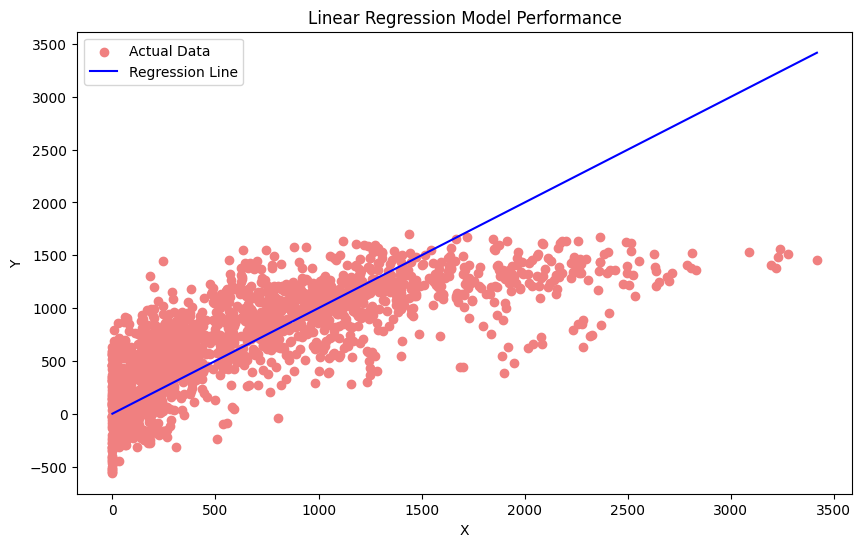

In [89]:
# Plot the Linear Regression

plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred, color='lightcoral', label='Actual Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='-', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Model Performance')
plt.legend()
plt.show()


- Lasso Regression

In [90]:
# Create and fit the Lasso regression model to the training data
# using the default value for alpha to 1 to reduce overfitting

lasso_model = Lasso(alpha=1, max_iter=10000).fit(X_train, y_train)
print("Lasso Intercept: ", lasso_model.intercept_)
print("-" * 50)
print("\nLasso Regression Model Coefficients:\n")
print(lasso_model.coef_)

Lasso Intercept:  758.694269394389
--------------------------------------------------

Lasso Regression Model Coefficients:

[ 188.79096735  199.38199816 -225.16711963   13.61250274    3.52793065
  141.82876331  -67.21327497  -64.09750249   13.19890078   -0.
  -45.27622511  -60.30970588   13.94647646 -113.88953752    0.
  201.67719405   -0.            6.01971491 -288.82966281 -893.05828684
    0.        ]


#Observation:
1- Intercept of 758 is the expected mean value of the dependent variable when the values for independent variables is 0.

2- The positive coefficients shows as independent variable increases dependent variable increases too.

3- The negative coefficient indicates that as the independent variable increases, the dependent variable decreases.

4- The magnitude of the coefficient shows the strength of the impact. A larger absolute value indicates a stronger effect

In [91]:
# Test the Lasso Regression

y_lasso_pred = lasso_model.predict(X_test)

lasso_mse = mean_squared_error(y_test, y_lasso_pred)

lasso_r2 = r2_score(y_test, y_lasso_pred)


In [92]:
# Find the best value of Alpha using Cross Validation
from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV(alphas=np.random.randint(0, 1000, 100), cv=10, max_iter=10000, n_jobs=-1).fit(X_train, y_train)
lasso_cv_model.alpha_

np.int64(5)

In [93]:
# Tune the model using the best alpha

lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_).fit(X_train, y_train)

y_lass_pred = lasso_tuned.predict(X_test)

lasso_tuned_mse = mean_squared_error(y_test, y_lass_pred)

lasso_tuned_r2 = r2_score(y_test, y_lass_pred)


- Lasso Model Evaluation

In [94]:
# Lasso Model evaluation pre tuning and post tuning

print("\tLasso Regression Metrics")
print("-" * 40)
print("Mean Squared Error of Lasso Model before tuning:", lasso_mse)
print("R-squaredof Lasso Model before tuning:", lasso_r2,"\n")
print("-" * 50)
print("\nMean Squared Error of Lasso Model after tuning:", lasso_tuned_mse)
print("R-squared of Lasso Model after tuning:", lasso_tuned_r2)

	Lasso Regression Metrics
----------------------------------------
Mean Squared Error of Lasso Model before tuning: 186479.34476808482
R-squaredof Lasso Model before tuning: 0.5487936260126568 

--------------------------------------------------

Mean Squared Error of Lasso Model after tuning: 188575.01515765957
R-squared of Lasso Model after tuning: 0.5437229312462812


- Ridge Regression

In [95]:
# Create a Ridge Regression Model

ridge_model = Ridge(alpha=1).fit(X_train, y_train)

print("Ridge Intercept: ", ridge_model.intercept_)
print("-" * 50)
print("\nRidge Regression Model Coefficients:\n")
print(ridge_model.coef_)

Ridge Intercept:  209.2771114225069
--------------------------------------------------

Ridge Regression Model Coefficients:

[ 189.08639028  152.46844838 -253.00441417   16.00818049    0.91355322
  197.89565305  -70.94453125  -63.53708573   15.64240048   -0.93154799
 -156.45315636 -159.02206199   15.27419452  -67.77767589   67.77767589
  371.24396111  -34.75858543   76.74436077 -413.22973645 -463.71882059
  463.71882059]


In [96]:
# Predict the train data

y_ridge_pred = ridge_model.predict(X_train)

# Predict the test data

y_ridge_pred_test = ridge_model.predict(X_test)

# Calculate the MSE and R2score for both

ridge_train_mse = mean_squared_error(y_train, y_ridge_pred)

ridge_train_r2 = r2_score(y_train, y_ridge_pred)

ridge_test_mse = mean_squared_error(y_test, y_ridge_pred_test)

ridge_test_r2 = r2_score(y_test, y_ridge_pred_test)

In [97]:
# Coefficients

ridge_model.coef_

array([ 189.08639028,  152.46844838, -253.00441417,   16.00818049,
          0.91355322,  197.89565305,  -70.94453125,  -63.53708573,
         15.64240048,   -0.93154799, -156.45315636, -159.02206199,
         15.27419452,  -67.77767589,   67.77767589,  371.24396111,
        -34.75858543,   76.74436077, -413.22973645, -463.71882059,
        463.71882059])

In [98]:
# Get the best alpha for the Ridge Model using cross validation

from sklearn.linear_model import RidgeCV

ridge_cv_model = RidgeCV(alphas=np.random.randint(0, 1000, 100), cv=10).fit(X_train, y_train)
ridge_cv_model.alpha_

np.int64(1)

In [99]:
# Tune the model using using the best alpha

ridge_tuned = Ridge(alpha=ridge_cv_model.alpha_, max_iter=10000).fit(X_train, y_train)

# Calculate the scores on train data

y_ridge_tuned_pred_train = ridge_tuned.predict(X_train)

ridge_tuned_mse = mean_squared_error(y_train, y_ridge_tuned_pred_train)

ridge_tuned_r2 = r2_score(y_train, y_ridge_tuned_pred_train)


# Calculate the scores on test data

y_ridge_tuned_pred_test = ridge_tuned.predict(X_test)

ridge_tuned_mse_test = mean_squared_error(y_test, y_ridge_tuned_pred_test)

ridge_tuned_r2_test = r2_score(y_test, y_ridge_tuned_pred_test)


- Ridge Model Evaluation

In [100]:
print("\t**Ridge Regression Metrics Before Tuning**")

print("MSE for training data before tuning", ridge_train_mse)
print("R-squared for training data before tuning", ridge_train_r2,"\n")

print("\nMSE for test data before tuning", ridge_test_mse)
print("R-squared for test data before tuning", ridge_test_r2)

print("-" * 50)

print("\t**Ridge Regression Metrics After Tuning**")
print("MSE for training data after tuning", ridge_tuned_mse)
print("R-squared for training data after tuning", ridge_tuned_r2,"\n")

print("\nMSE for test data after tuning", ridge_tuned_mse_test)
print("R-squared for test data after tuning", ridge_tuned_r2_test)


	**Ridge Regression Metrics Before Tuning**
MSE for training data before tuning 185096.58059707397
R-squared for training data before tuning 0.555733137322673 


MSE for test data before tuning 186614.5446106459
R-squared for test data before tuning 0.548466495783829
--------------------------------------------------
	**Ridge Regression Metrics After Tuning**
MSE for training data after tuning 185096.58059707397
R-squared for training data after tuning 0.555733137322673 


MSE for test data after tuning 186614.5446106459
R-squared for test data after tuning 0.548466495783829
